In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [142]:
# Load All Stocks Data
netflix_stock_data = pd.read_csv('../data/nflx_stock_data_cleaned.csv')
cnk_stock_data = pd.read_csv('../data/cnk_stock_data_cleaned.csv')
imax_stock_data = pd.read_csv('../data/imax_stock_data_cleaned.csv')
amc_stock_data = pd.read_csv('../data/amc_stock_data_cleaned.csv')
# Load Box Office Movies Data
movies_data = pd.read_csv('../data/movies_data_cleaned.csv')
# Load Netflix Revenue and Subscribers Data
netflix_data = pd.read_csv('../data/netflix_revenue_data_cleaned.csv')

## **Stock Trends Analysis**


>#### **Question:**
>What is the average quarterly adjusted closing price and total trading volume for Netflix, AMC, Cinemark, and IMAX over the past 10 years?


In [143]:
def calculate_quarterly_averages(stock_data, stock_name):
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    stock_data.set_index('date', inplace=True)
    quarterly_data = stock_data.resample('QE').agg({
        'adjusted_close': 'mean',
        'volume': 'sum'
    })
    quarterly_data['stock'] = stock_name
    return quarterly_data

In [144]:
netflix_quarterly = calculate_quarterly_averages(netflix_stock_data, 'Netflix')
amc_quarterly = calculate_quarterly_averages(amc_stock_data, 'AMC')
cnk_quarterly = calculate_quarterly_averages(cnk_stock_data, 'Cinemark')
imax_quarterly = calculate_quarterly_averages(imax_stock_data, 'IMAX')

all_quarterly_data = pd.concat([netflix_quarterly, amc_quarterly, cnk_quarterly, imax_quarterly])

In [145]:
print(all_quarterly_data)

                           adjusted_close      volume    stock
date                                                          
2014-03-31 00:00:00+00:00       57.261335  1295042700  Netflix
2014-06-30 00:00:00+00:00       54.112290  1525102600  Netflix
2014-09-30 00:00:00+00:00       64.852589   972458900  Netflix
2014-12-31 00:00:00+00:00       53.690446  1105811000  Netflix
2015-03-31 00:00:00+00:00       60.658946   963482800  Netflix
...                                   ...         ...      ...
2023-09-30 00:00:00+00:00       18.428730    34173100     IMAX
2023-12-31 00:00:00+00:00       17.110635    44764500     IMAX
2024-03-31 00:00:00+00:00       15.196066    50574800     IMAX
2024-06-30 00:00:00+00:00       16.542222    49881700     IMAX
2024-09-30 00:00:00+00:00       17.755714    18669900     IMAX

[172 rows x 3 columns]


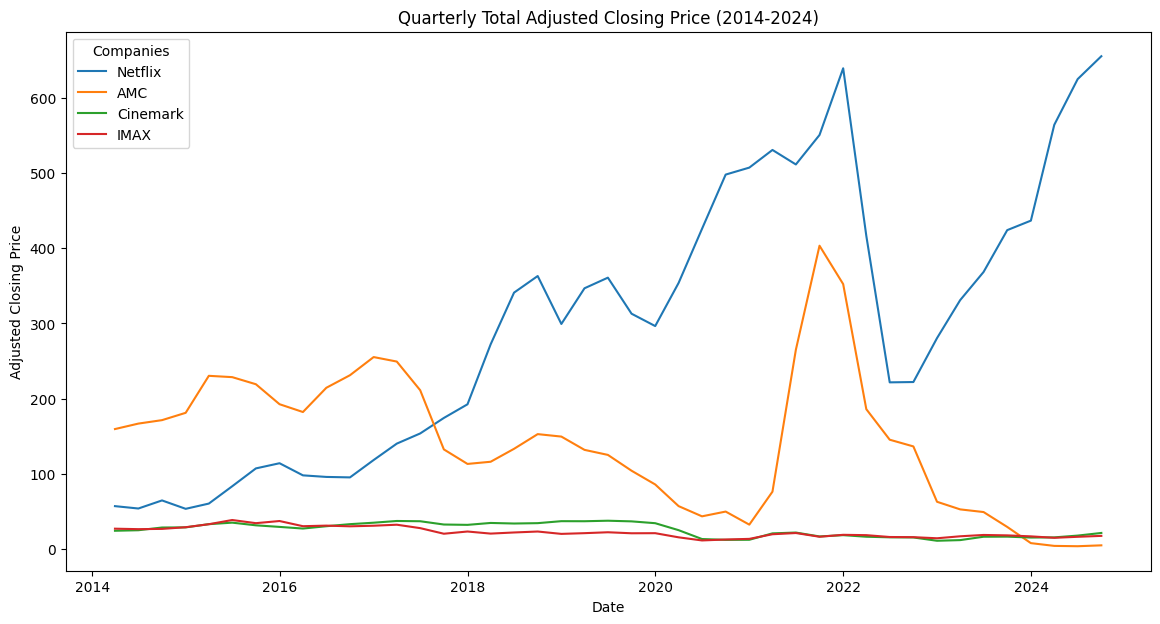

In [146]:
plt.figure(figsize=(14,7))

sns.lineplot(data=netflix_quarterly, x='date', y='adjusted_close', label='Netflix')
sns.lineplot(data=amc_quarterly, x='date', y='adjusted_close', label='AMC')
sns.lineplot(data=cnk_quarterly, x='date', y='adjusted_close', label='Cinemark')
sns.lineplot(data=imax_quarterly, x='date', y='adjusted_close', label='IMAX')

plt.title('Quarterly Total Adjusted Closing Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend(title='Companies')
plt.show()

> #### **Question:**
> For each stock, what were the highest and lowest adjusted close prices, and when did they occur?

In [147]:
def find_high_low_prices(stock_data, stock_name):
    stock_data.reset_index(inplace=True)
    highest = stock_data.loc[stock_data['adjusted_close'].idxmax()]
    lowest = stock_data.loc[stock_data['adjusted_close'].idxmin()]
    highest_price = highest['adjusted_close']
    highest_date = highest['date']
    lowest_price = lowest['adjusted_close']
    lowest_date = lowest['date']

    print(f"{stock_name}")
    print("Highest price : ", f"${highest_price:.2f} in {highest_date}")
    print("Lowest price : ", f"${lowest_price:.2f} in {lowest_date}")

In [148]:
find_high_low_prices(netflix_stock_data, "Netflix")
find_high_low_prices(amc_stock_data, "AMC")
find_high_low_prices(cnk_stock_data, "Cinemark")
find_high_low_prices(imax_stock_data, "IMAX")

Netflix
Highest price :  $691.69 in 2021-11-17 00:00:00+00:00
Lowest price :  $44.89 in 2014-04-28 00:00:00+00:00
AMC
Highest price :  $625.50 in 2021-06-02 00:00:00+00:00
Lowest price :  $2.47 in 2024-04-15 00:00:00+00:00
Cinemark
Highest price :  $40.60 in 2019-05-03 00:00:00+00:00
Lowest price :  $6.58 in 2020-03-18 00:00:00+00:00
IMAX
Highest price :  $43.22 in 2015-06-19 00:00:00+00:00
Lowest price :  $7.16 in 2020-03-17 00:00:00+00:00


>#### **Question:**
>How did the year-over-year (YoY) stock price changes compare between AMC, Cinemark, IMAX, and Netflix?

In [149]:
def calculate_yoy_change(stock_data, stock_name):
    stock_data.set_index('date', inplace=True)

    yearly_average = stock_data['adjusted_close'].resample('YE').mean()
    yoy_change = yearly_average.pct_change() * 100
    yoy_data = pd.DataFrame({f"{stock_name} YoY Change (%)": yoy_change})

    return yoy_data

In [150]:
netflix_yoy = calculate_yoy_change(netflix_stock_data, "Netflix")
amc_yoy = calculate_yoy_change(amc_stock_data, "AMC")
cnk_yoy = calculate_yoy_change(cnk_stock_data, "Cinemark")
imax_yoy = calculate_yoy_change(imax_stock_data, "IMAX")
yoy_combined = pd.concat([netflix_yoy, amc_yoy, cnk_yoy, imax_yoy], axis=1)
yoy_combined

,Netflix YoY Change (%),AMC YoY Change (%),Cinemark YoY Change (%),IMAX YoY Change (%)
date,,,,
2014-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN
2015-12-31 00:00:00+00:00,59.832132,27.985473,20.548606,30.788897
2016-12-31 00:00:00+00:00,11.028465,1.660468,-2.489121,-14.266512
2017-12-31 00:00:00+00:00,62.083391,-20.254608,10.373612,-15.365755
2018-12-31 00:00:00+00:00,93.071348,-21.625169,0.783663,-16.852303
2019-12-31 00:00:00+00:00,3.001050,-19.230621,4.002243,-0.667030
2020-12-31 00:00:00+00:00,35.866452,-58.921480,-56.587808,-37.337215
2021-12-31 00:00:00+00:00,24.929202,503.191910,23.868744,42.435658
2022-12-31 00:00:00+00:00,-49.009276,-52.078176,-24.750335,-15.062829


In [151]:
yoy_combined.max()

Netflix YoY Change (%)      93.071348
AMC YoY Change (%)         503.191910
Cinemark YoY Change (%)     23.868744
IMAX YoY Change (%)         42.435658
dtype: float64

In [152]:
min_max_yoy_changes = yoy_combined.idxmax().dt.year.to_frame(name='Max Year')
min_max_yoy_changes['Max YoY Change (%)'] = yoy_combined.max()
min_max_yoy_changes['Min Year'] = yoy_combined.idxmin().dt.year
min_max_yoy_changes['Min YoY Change (%)'] = yoy_combined.min()
min_max_yoy_changes

,Max Year,Max YoY Change (%),Min Year,Min YoY Change (%)
Netflix YoY Change (%),2018,93.071348,2022,-49.009276
AMC YoY Change (%),2021,503.191910,2024,-87.479140
Cinemark YoY Change (%),2021,23.868744,2020,-56.587808
IMAX YoY Change (%),2021,42.435658,2020,-37.337215


## **Impact of COVID-19 and Industry Recovery**

>#### **Question:**
>How has box office gross changed during and after the COVID-19 pandemic?

In [153]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 3951 non-null   int64 
 1   date                 3951 non-null   object
 2   day                  3951 non-null   object
 3   day_number           3951 non-null   int64 
 4   top10_gross_dollars  3951 non-null   int64 
 5   %± YD                3951 non-null   object
 6   %± LW                3951 non-null   object
 7   Releases             3951 non-null   int64 
 8   top1_release         3951 non-null   object
 9   gross_dollars        3951 non-null   int64 
 10  event                708 non-null    object
dtypes: int64(5), object(6)
memory usage: 339.7+ KB


In [154]:
movies_data.head(5)

,year,date,day,day_number,top10_gross_dollars,%± YD,%± LW,Releases,top1_release,gross_dollars,event
0,2014,2014-01-01,Wednesday,1,48419707,+35%,-27.9%,49,Frozen,8718939,New Year's Day
1,2014,2014-01-02,Thursday,2,25361378,-47.6%,-56.6%,49,Frozen,5304617,NaN
2,2014,2014-01-03,Friday,3,42939384,+69.3%,-26.8%,45,Paranormal Activity: The Marked Ones,8722144,NaN
3,2014,2014-01-04,Saturday,4,49402611,+15.1%,-19.7%,45,Frozen,8037475,NaN
4,2014,2014-01-05,Sunday,5,26723321,-45.9%,-44.1%,45,Frozen,4785996,NaN


In [155]:
movies_data['date'] = pd.to_datetime(movies_data['date'])
pre_covid = movies_data[(movies_data['date'] < '2020-03-01')]
during_covid = movies_data[(movies_data['date'] >= '2020-03-01') & (movies_data['date'] < '2021-07-01')]
post_covid = movies_data[movies_data['date'] >= '2021-07-01']

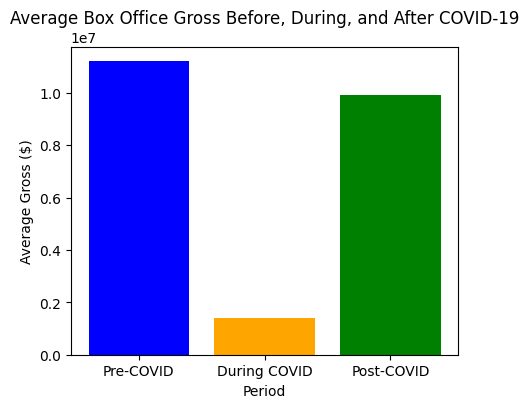

11195118.526876943


In [176]:
pre_covid_gross = pre_covid['gross_dollars'].mean()
during_covid_gross = during_covid['gross_dollars'].mean()
post_covid_gross = post_covid['gross_dollars'].mean()

periods = ['Pre-COVID', 'During COVID', 'Post-COVID']
means = [pre_covid_gross, during_covid_gross, post_covid_gross]

plt.figure(figsize=(5, 4))
plt.bar(periods, means, color=['blue', 'orange', 'green'])
plt.title('Average Box Office Gross Before, During, and After COVID-19')
plt.xlabel('Period')
plt.ylabel('Average Gross ($)')
plt.show()

In [186]:
quarterly_gross = movies_data.resample('QE', on='date')['gross_dollars'].sum()
quarterly_gross = quarterly_gross.iloc[:-1] # The most recent data doesn't have a full quarter (ends in October)
lowest_point = quarterly_gross.min()
highest_point  = quarterly_gross.max()
lowest_date = quarterly_gross.idxmin()
highest_date = quarterly_gross.idxmax()

print("Lowest quarterly gross: ", lowest_point, " on ", lowest_date)
print("Highest quarterly gross: ", highest_point, " on ", highest_date)

Lowest quarterly gross:  1910919  on  2020-06-30 00:00:00
Highest quarterly gross:  1639365211  on  2018-06-30 00:00:00


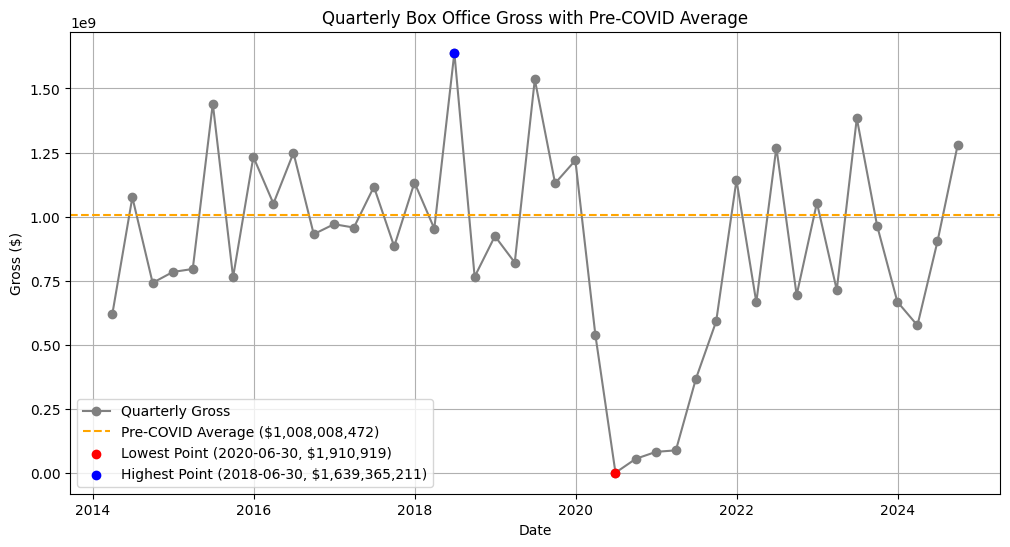

In [198]:
pre_covid_quarterly_avg = pre_covid.resample('QE', on='date')['gross_dollars'].sum().mean()
post_covid_quarterly_avg = post_covid.resample('QE', on='date')['gross_dollars'].sum().mean()

plt.figure(figsize=(12, 6))
plt.plot(quarterly_gross.index, quarterly_gross.values, marker='o', linestyle='-', color='gray', label='Quarterly Gross')
plt.axhline(pre_covid_quarterly_avg, color='orange', linestyle='--', label=f'Pre-COVID Average (${pre_covid_quarterly_avg:,.0f})')

# Mark the highest and lowest points
plt.scatter([lowest_date], [lowest_point], color='red', label=f'Lowest Point ({lowest_date.date()}, ${lowest_point:,.0f})', zorder=5)
plt.scatter([highest_date], [highest_point], color='blue', label=f'Highest Point ({highest_date.date()}, ${highest_point:,.0f})', zorder=5)

plt.title('Quarterly Box Office Gross with Pre-COVID Average')
plt.xlabel('Date')
plt.ylabel('Gross ($)')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
difference = pre_covid_quarterly_avg - post_covid_quarterly_avg
print(f"Post-COVID quarterly average is ${difference:,.0f} less than the Pre-COVID quarterly average.")

Post-COVID quarterly average is $144,573,845 less than the Pre-COVID quarterly average.


In [158]:
movies_data.describe()

,year,date,day_number,top10_gross_dollars,Releases,gross_dollars
count,3951.000000,3951,3951.000000,3.951000e+03,3951.000000,3.951000e+03
mean,2018.922045,2019-06-01 12:58:29.794988544,180.917236,2.220678e+07,42.621362,9.609120e+06
min,2014.000000,2014-01-01 00:00:00,1.000000,4.000000e+00,1.000000,4.000000e+00
25%,2016.000000,2016-09-14 12:00:00,91.000000,6.936836e+06,34.000000,2.080691e+06
50%,2019.000000,2019-05-30 00:00:00,181.000000,1.544055e+07,45.000000,5.268381e+06
75%,2022.000000,2022-02-16 12:00:00,270.000000,3.369346e+07,52.000000,1.242815e+07
max,2024.000000,2024-10-31 00:00:00,366.000000,1.690247e+08,103.000000,1.574616e+08
std,3.127258,NaN,104.529862,2.005052e+07,13.747281,1.235347e+07


Check for events in box ticket that contains `covid`

In [159]:
covid_time_data = movies_data[(movies_data['date'] >= '2019-01-01') & (movies_data['date'] <= '2022-12-31')]
events = covid_time_data ['event'].unique()
events

array(["New Year's Day", nan, 'MLK Day', "Presidents' Day",
       'Easter Sunday', 'Memorial Day', 'Independence Day', 'Labor Day',
       "Indig. Peoples' Day", 'Halloween', 'Thanksgiving',
       'Christmas Day', "New Year's Eve", 'COVID-19 Pandemic',
       'COVID-19 Pandemic\nEaster Sunday',
       'COVID-19 Pandemic\nMemorial Day',
       'COVID-19 Pandemic\nIndependence Day',
       'COVID-19 Pandemic\nLabor Day',
       "COVID-19 Pandemic\nIndig. Peoples' Day",
       'COVID-19 Pandemic\nHalloween', 'COVID-19 Pandemic\nThanksgiving',
       'COVID-19 Pandemic\nChristmas Day',
       "COVID-19 Pandemic\nNew Year's Eve",
       "COVID-19 Pandemic\nNew Year's Day", 'COVID-19 Pandemic\nMLK Day',
       "COVID-19 Pandemic\nPresidents' Day", 'World Cup (Qatar)',
       'Thanksgiving\nWorld Cup (Qatar)'], dtype=object)

In [160]:
amc_stock_data['date'] = pd.to_datetime(amc_stock_data['date'])
netflix_stock_data['date'] = pd.to_datetime(netflix_stock_data['date'])
netflix_stock_data.set_index('date', inplace=True)
amc_stock_data.set_index('date', inplace=True)

KeyError: 'date'

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=netflix_stock_data, x=netflix_stock_data.index, y='adjusted_close')
plt.title('Netflix Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=amc_stock_data, x=amc_stock_data.index, y='adjusted_close')
plt.title('AMC Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
movies_data.info()

In [ ]:
movies_data['date'] = pd.to_datetime(movies_data['date'])
movies_data.set_index('date', inplace=True)
print(type(movies_data.index))

In [ ]:
plt.figure(figsize=(14, 7))
monthly_box_office = movies_data['gross_dollars'].resample('ME').sum()
sns.lineplot(x=monthly_box_office.index, y=monthly_box_office)
plt.title('Monthly Box Office Gross Over Time')
plt.xlabel('Date')
plt.ylabel('Total Gross Dollars')
plt.show()